# Part I - Prosper Loan Data Exploration
### by Tristen Wallace

## 1. Preliminary Wrangling Assessment

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import custom_funcs

%matplotlib inline

Professionals


In [2]:
# Load dataset
file_path = '../data/prosperLoanData.csv'
df = pd.read_csv(file_path)

#Data structure
print(df.shape)

#Preview data
df.sample(5)


(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
29983,D0C435382200797897C8B0F,556376,2012-02-03 14:01:19.490000000,NaN,60,Completed,2013-11-21 00:00:00,0.27246,0.2468,0.2368,...,-232.79,0.0,0.00,0.00,0.0,1.0,0,0,0.0,68
84594,3F20342833875264590C52C,383860,2008-08-16 19:22:54.010000000,E,36,Defaulted,2010-01-30 00:00:00,0.37453,0.3500,0.3400,...,-10.96,0.0,947.21,947.21,0.0,1.0,0,0,0.0,10
81140,564F356163240569905E35E,656999,2012-10-20 10:01:45.490000000,NaN,60,Completed,2014-01-07 00:00:00,0.27462,0.2489,0.2389,...,-167.29,0.0,0.00,0.00,0.0,1.0,0,0,0.0,220
81731,8F4D3575640093920F91E8A,746313,2013-04-07 17:48:42.217000000,NaN,60,Past Due (1-15 days),NaN,0.32393,0.2969,0.2869,...,-33.37,0.0,0.00,0.00,0.0,1.0,0,0,0.0,38
3396,556C359618868284691131C,1060451,2013-12-08 12:30:57.343000000,NaN,36,Current,NaN,0.09434,0.0809,0.0709,...,-25.17,0.0,0.00,0.00,0.0,1.0,0,0,0.0,284


In [3]:
# Review variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Review daterange
df.describe()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


**Dimensionality Reduction:** We don't need many of these columns so we will create a subset with only the columns/features that interest us for this project.

In [5]:
# Varaibles of interest
cols = ['LoanStatus', 'Term', 'CreditGrade', 'BorrowerAPR',
        'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
        'IsBorrowerHomeowner', 'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'ListingNumber', 'ProsperPrincipalBorrowed',
        'ProsperPrincipalOutstanding', 'LoanOriginalAmount', 'LoanOriginationDate', 'MemberKey', 'InvestmentFromFriendsCount', 
        'InvestmentFromFriendsAmount', 'Investors']

df_sub = df[cols]

# Descriptive statistics
df_sub.describe()


,Term,BorrowerAPR,ListingCategory (numeric),DebtToIncomeRatio,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,2.774209,0.275947,6.278857e+05,8472.311961,2930.313906,8337.01385,0.023460,16.550751,80.475228
std,10.436212,0.080364,3.996797,0.551759,3.280762e+05,7395.507650,3806.635075,6245.80058,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,0.000000,4.000000e+00,0.000000,0.000000,1000.00000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,1.000000,0.140000,4.009190e+05,3500.000000,0.000000,4000.00000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,1.000000,0.220000,6.005540e+05,6000.000000,1626.550000,6500.00000,0.000000,0.000000,44.000000
75%,36.000000,0.283810,3.000000,0.320000,8.926340e+05,11000.000000,4126.720000,12000.00000,0.000000,0.000000,115.000000
max,60.000000,0.512290,20.000000,10.010000,1.255725e+06,72499.000000,23450.950000,35000.00000,33.000000,25000.000000,1189.000000


In [6]:
# Rename variables
df_sub = df_sub.rename(columns={'ProsperRating (Alpha)':'ProsperRating',
                        'ListingCategory (numeric)':'ListingCategory'})

In [7]:
# Check for missing values
df_sub.isnull().sum().sort_values(ascending=False)

GroupKey                       100596
ProsperPrincipalOutstanding     91852
ProsperPrincipalBorrowed        91852
CreditGrade                     84984
ProsperRating                   29084
DebtToIncomeRatio                8554
BorrowerState                    5515
Occupation                       3588
EmploymentStatus                 2255
BorrowerAPR                        25
InvestmentFromFriendsAmount         0
InvestmentFromFriendsCount          0
MemberKey                           0
LoanOriginationDate                 0
LoanOriginalAmount                  0
LoanStatus                          0
ListingNumber                       0
IncomeRange                         0
Term                                0
IsBorrowerHomeowner                 0
ListingCategory                     0
Investors                           0
dtype: int64

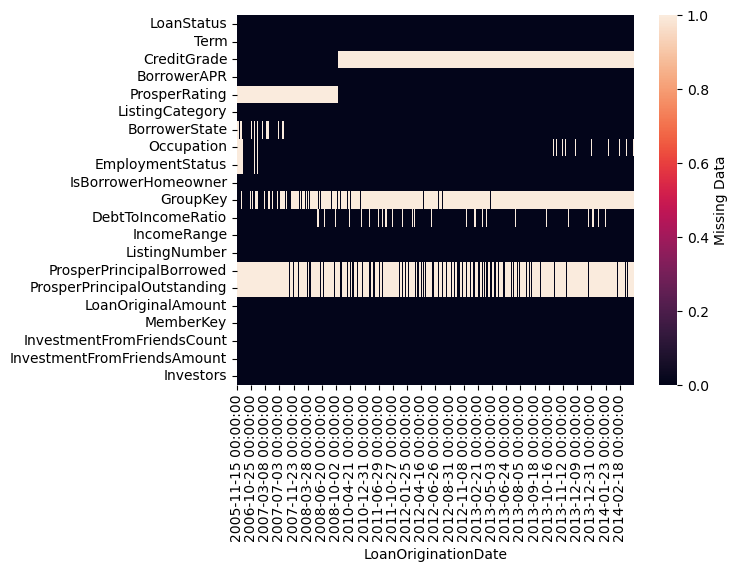

In [8]:
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
sns.heatmap(df_sub.set_index('LoanOriginationDate').sort_index().isna().transpose(),
            cbar_kws={'label':'Missing Data'});

In [9]:
# Descriptive statistics of loans where at least one friend invested
df_sub.query('InvestmentFromFriendsCount > 1').describe() 


,Term,BorrowerAPR,ListingCategory,DebtToIncomeRatio,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,296.000000,296.000000,296.000000,240.000000,2.960000e+02,72.000000,72.000000,296.000000,296.000000,296.000000,296.000000
mean,36.324324,0.176282,1.939189,0.450500,3.234413e+05,8323.430556,2286.484306,8362.452703,2.831081,1570.096655,145.716216
std,3.407303,0.085295,2.138355,1.408578,1.467491e+05,7449.745102,2900.049803,6726.983332,2.609990,2627.150381,126.895048
min,12.000000,0.056720,0.000000,0.010000,1.001990e+05,1000.000000,0.000000,1000.000000,2.000000,55.000000,2.000000
25%,36.000000,0.105910,0.000000,0.110000,2.293972e+05,2500.000000,0.000000,3181.250000,2.000000,221.832500,54.500000
50%,36.000000,0.158825,1.000000,0.215000,3.303085e+05,5225.000000,1160.355000,5750.000000,2.000000,551.980000,104.500000
75%,36.000000,0.223510,3.000000,0.350000,3.964090e+05,11250.000000,3544.612500,10500.000000,3.000000,1500.000000,207.000000
max,60.000000,0.374530,7.000000,10.010000,1.063442e+06,30000.000000,13568.900000,25000.000000,33.000000,23699.520000,667.000000


In [10]:
# Check unique income ranges
df_sub.IncomeRange.value_counts()

IncomeRange
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: count, dtype: int64

In [11]:
# Check counts for unique term lengths
df_sub.Term.value_counts()

Term
36    87778
60    24545
12     1614
Name: count, dtype: int64

In [12]:
# Check counts for unique loan statuses
df_sub.LoanStatus.value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [13]:
# Check counts for unique employment statuses
df_sub.EmploymentStatus.value_counts()

EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

In [14]:
df_sub.query('EmploymentStatus == "Not available"')['IncomeRange']


2         Not displayed
17        Not displayed
42        Not displayed
63        Not displayed
76        Not displayed
              ...      
113797    Not displayed
113819    Not displayed
113825    Not displayed
113848    Not displayed
113926    Not displayed
Name: IncomeRange, Length: 5347, dtype: object

In [15]:
# Check unique occupation values
df_sub.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [16]:
# How many different occupations?
df_sub.Occupation.unique().size

68

In [17]:
# Compare credit grade and Prosper rating
print(df_sub.ProsperRating.unique())
print(df_sub.CreditGrade.unique())

[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']


In [18]:
df_sub.ListingCategory.value_counts().sort_values(ascending=False)

ListingCategory
1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: count, dtype: int64

> Multiple variables contain placeholders for NaN values that avoided detection when searching for missing values. We should replace these values in `ListingCategory`, `IncomeRange`, and `EmploymentStatus` and reassess missing values visual.

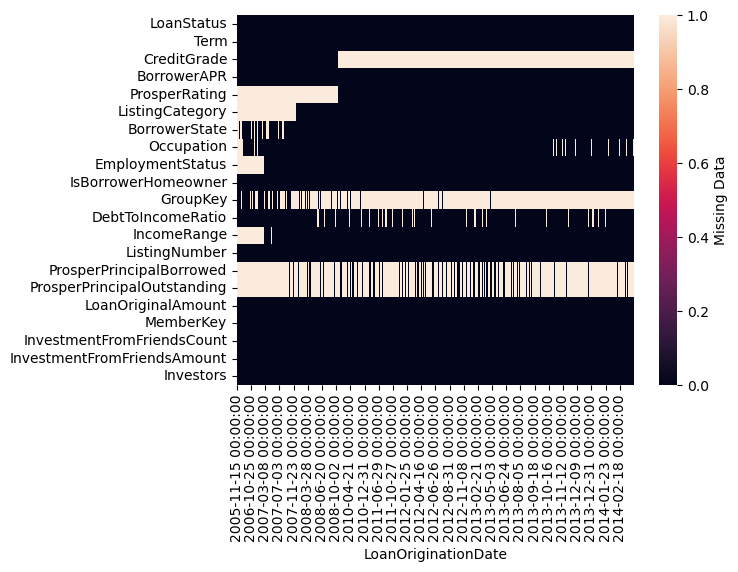

In [19]:
# Replace placeholders with NaN values
df_sub.ListingCategory = df_sub.ListingCategory.replace({0:np.nan})
df_sub.IncomeRange = df_sub.IncomeRange.replace({'Not displayed':np.nan})
df_sub.EmploymentStatus = df_sub.EmploymentStatus.replace({'Not available':np.nan})

# Visualize missing values
sns.heatmap(df_sub.set_index('LoanOriginationDate').sort_index().isna().transpose(),
            cbar_kws={'label':'Missing Data'});

> After assessing our variables of interest it's clear that we have several cleaning tasks to perform:

1. Our analysis doesn't require the granularity present in `LoanStatus`. We can combine the past due category and combine 'FinalPaymentInProgress' with 'Completed'.

2. Our analysis doesn't require the granularity present in `Occupation`. We can group occupations into smaller categories using ISCO grouping standards.

3. Based on the heatmap and their unique values comparison, we can see the `CreditGrade` and `ProsperRating` store the same variables. The two can be melted into one column using the ranking scheme AA - HR.

4. 19.4% of borrowers had exisiting loan balances with Prosper at the time of new loan origination. These pre-existing loan totals are stored in `ProsperPrincipalBorrowed` and `ProsperPrincipalOutstanding`. While in missing value assessment these variables appear to have 80.6% NaN values and qualify for removal, descriptive statistics show that the 19.4% of values have a meaningful value size to warrant keeping them. To deal with the missing values, we can engineer new 'TotalBorrowed' and 'TotalOutstanding' variables by combining the variables above with LoanOriginalAmount. 

5. Our analysis doesn't require the granularity present in `ListingCategory`. To reduce the categories, we'll keep the top 8 (1,7, 2, 3, 6, 4, 13, 15, 18), and lump the remaining in with 'Other'. `ListingCategory` is also only missing values from before 08', but we can't drop these rows and it would be misleading to replace the NaN values with a common value. The best option is to leave the missing category as it was.

7. `IncomeRange` and `EmploymentStatus` weren't recorded prior to 07'. That date range isn't relavent to our analysis, so we can just drop the missing rows along with the remaining NaN values throughout the dataset

6. Remove unnecessary variables:
    - Group Key: Contains more than 70% NaN
    - IsBorrowerHomeowner, MemberKey: Not needed for our analysis


## 2. Data Cleaning

In [20]:
clean_df = df_sub.copy()

### 7. Remove unnecessary variables

In [21]:
clean_df.drop(['GroupKey', 'IsBorrowerHomeowner', 'MemberKey'], axis=1, inplace=True)

### 2. Group Occupation Categories

In [22]:
# Rename Occupation values to ISCO categories using custom mapp
for index, row in clean_df.iterrows():
    clean_df.at[index, 'Occupation'] = custom_funcs.map_occupation_to_isco(row['Occupation'])

In [23]:
isco = ['Professionals', 'Clerical Support', 'Managers', 'Service/Sales',
        'Craft Workers', 'Other', 'Technicians', 'Skilled Agr/Forestry',
        'Operators/Assemblers', 'Armed Forces', 'Elementary']

# Test Occupations were converted
assert(all((clean_df.Occupation.value_counts().index == isco)))


### 1. Combine LoanStatus Categories

In [24]:
clean_df.LoanStatus = clean_df.LoanStatus.replace({'Past Due (1-15 days)': 'Past Due',
                        'Past Due (31-60 days)': 'Past Due',
                        'Past Due (61-90 days)': 'Past Due',
                        'Past Due (91-120 days)': 'Past Due',
                        'Past Due (16-30 days)': 'Past Due',
                        'Past Due (>120 days)': 'Past Due',
                        'FinalPaymentInProgress': 'Completed'})

In [25]:
loan_statuses = ['Current', 'Completed', 'Chargedoff', 'Defaulted',
        'Past Due', 'Cancelled']

# Test loan statuses were converted
assert(all((clean_df.LoanStatus.value_counts().index == loan_statuses)))

### 3. Merge CreditGrade and ProsperRating into one column

In [26]:
# Merge columns
ratings = ['CreditGrade','ProsperRating']
other = clean_df.columns.difference(ratings)
clean_df= clean_df.melt(id_vars = other, value_vars = ratings, 
                        var_name = 'CreditType', value_name = 'CreditRating')

# Drop the redundant null value rows from the merged column
clean_df = clean_df[~clean_df.CreditRating.isnull()]

clean_df[['CreditType', 'CreditRating']]

,CreditType,CreditRating
0,CreditGrade,C
2,CreditGrade,HR
11,CreditGrade,C
17,CreditGrade,AA
21,CreditGrade,D
...,...,...
227869,ProsperRating,C
227870,ProsperRating,A
227871,ProsperRating,D
227872,ProsperRating,C


### 4. Engineer 'TotalBorrowed' and 'TotalOutstanding' variables

In [27]:
# Create TotalBorrowed var
clean_df['TotalBorrowed'] = np.where(clean_df.ProsperPrincipalBorrowed.isna(),
                                clean_df.LoanOriginalAmount,
                                clean_df.ProsperPrincipalBorrowed + clean_df.LoanOriginalAmount)

# Create TotalOutstanding var
clean_df['TotalOutstanding'] = np.where(clean_df.ProsperPrincipalOutstanding.isna(),
                                clean_df.LoanOriginalAmount,
                                clean_df.ProsperPrincipalOutstanding + clean_df.LoanOriginalAmount)

# Drop Prosper values
clean_df.drop(['ProsperPrincipalOutstanding', 'ProsperPrincipalBorrowed'], axis=1, inplace=True)

clean_df[['TotalOutstanding', 'TotalBorrowed']]

,TotalOutstanding,TotalBorrowed
0,9425.00,9425.0
2,3001.00,3001.0
11,1000.00,1000.0
17,10000.00,10000.0
21,3000.00,3000.0
...,...,...
227869,10000.00,10000.0
227870,6815.42,35501.0
227871,10000.00,10000.0
227872,18264.37,20000.0


### 5. Consolidate ListingCategory

In [28]:
# Replace non-interest categories with 7
clean_df.ListingCategory.fillna(0, inplace=True)
clean_df.ListingCategory = clean_df.ListingCategory.replace({5:7, 8:7, 9:7, 10:7, 11:7, 12:7, 14:7, 
                                                    16:7, 17:7, 19:7, 20:7}).astype('int')
# Visually confirm values consolidated and NaN are 0
clean_df.ListingCategory.value_counts() 

ListingCategory
1     58242
0     16965
7     14642
2      7422
3      7172
6      2565
4      2395
13     1996
15     1522
18      885
Name: count, dtype: int64

### 6. Drop NaN values

Prior to dropping values I've decided to further assess the 'Occupation' and 'DebtToIncomeRatio' variables to determine how best to handle their NaN values.

EmploymentStatus
Employed         0.221141
Full-time        0.232639
Not employed     0.985629
Other            0.648713
Part-time        0.371878
Retired          0.962073
Self-employed    0.370799
Name: count, dtype: float64
IncomeRange
$0                1.000000
$1-24,999         0.125327
$100,000+         0.073033
$25,000-49,999    0.071691
$50,000-74,999    0.054475
$75,000-99,999    0.053317
Not employed      0.903226
Name: count, dtype: float64


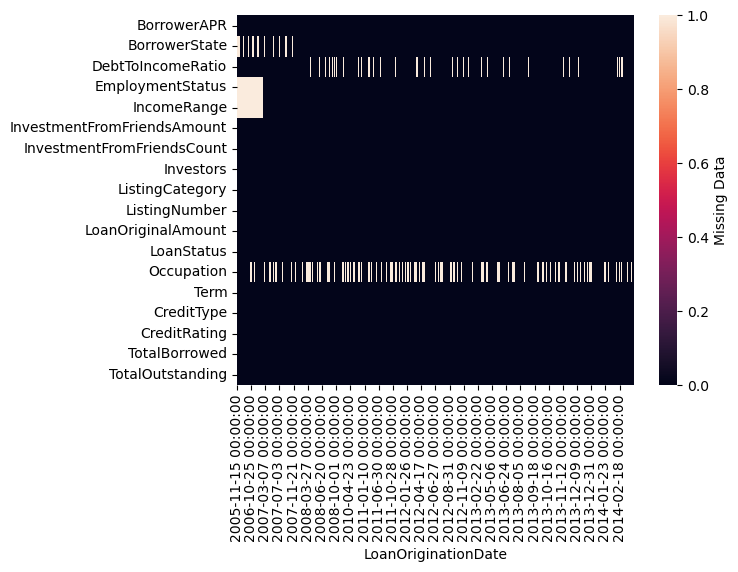

In [29]:
# Visualize missing values
sns.heatmap(clean_df.set_index('LoanOriginationDate').sort_index().isna().transpose(),
            cbar_kws={'label':'Missing Data'});

# Check if Occupation nulls are due to certain employment statuses 
print(clean_df.query('Occupation.isnull()').EmploymentStatus.value_counts() / clean_df.EmploymentStatus.value_counts())

# Check if DebtToIncomeRatio nulls are due to $0 income
print(clean_df.query('DebtToIncomeRatio.isnull()').IncomeRange.value_counts() / clean_df.IncomeRange.value_counts())


> It's likely some null values for DebtToIncomeRatio are due to "divide by zero" errors when there is no income. We will replace these values with 1.

In [30]:
# Check descriptive stats prior to replacement
print(clean_df.DebtToIncomeRatio.describe())

# Replace Self-Employed DebtToIncomeRatio with mean of those individuals .fillna(mean_self_dir, inplace=True)
fill_df = clean_df.loc[(clean_df.IncomeRange == "$0") | (clean_df.IncomeRange == "Not employed"), 
                        ['DebtToIncomeRatio']].fillna({'DebtToIncomeRatio':1})

clean_df.loc[(clean_df.IncomeRange == "$0") | (clean_df.IncomeRange == "Not employed"), 
                        ['DebtToIncomeRatio']] = fill_df

# Compare descriptive stats after
print(clean_df.DebtToIncomeRatio.describe())

count    105263.000000
mean          0.275976
std           0.551811
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64
count    106612.000000
mean          0.285138
std           0.554249
min           0.000000
25%           0.144162
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64


> It appears Occupation nulls are disproportionately due to unemployed and retired individuals not having an occupation. We will create an unemployed category to account for them.

In [31]:
# Replace occupation where employment status is not employed or retired 

fill_df = clean_df.loc[(clean_df.EmploymentStatus == "Retired") | (clean_df.IncomeRange == "Not employed"), 
                        ['Occupation']].fillna({'Occupation':'No Occupation'})
clean_df.loc[(clean_df.EmploymentStatus == "Retired") | (clean_df.IncomeRange == "Not employed"), 
                        ['Occupation']] = fill_df

# Visually verify values were updated
clean_df.Occupation.value_counts()

Occupation
Professionals           38935
Clerical Support         8926
Managers                 8455
Service/Sales            8099
Craft Workers            6180
Other                    3802
Technicians              2376
Skilled Agr/Forestry     2234
Operators/Assemblers     2185
Armed Forces             1616
Elementary               1595
No Occupation            1556
Name: count, dtype: int64

In [32]:
# Drop missing values
clean_df.dropna(inplace=True)

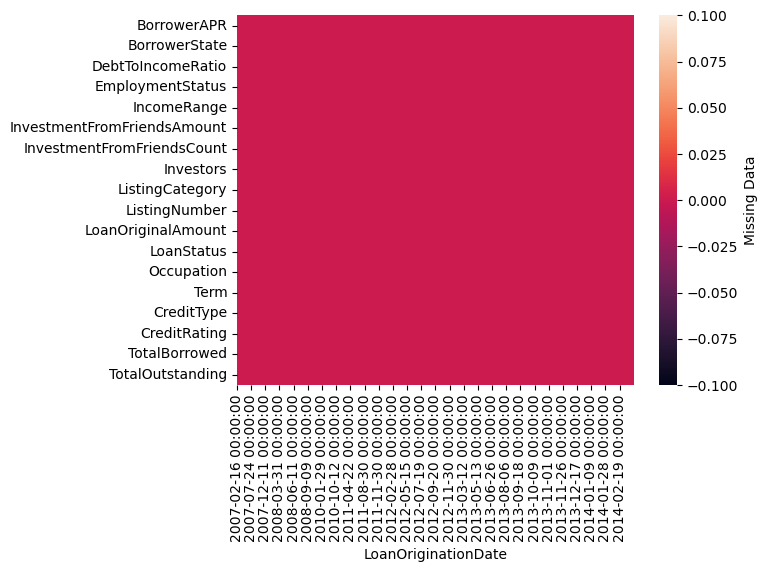

In [33]:
# Confirm all missing values were removed
sns.heatmap(clean_df.set_index('LoanOriginationDate').sort_index().isna().transpose(),
            cbar_kws={'label':'Missing Data'});

## 3. Store Data

In [34]:
# save the clean copy
clean_df.to_csv('../data/prosperLoanData_clean_v1.csv', index = False)

## 4. Import Clean Data & Define Structure

> There are 74,019 loan listings in the dataset with 18 variables (excluding the ID variable for identifying loan listings) for our exploration. The variables are almost split between qualitative and quantitative. Of the quantitative features, there is one date (Loan Origination), two discrete (Term, InvestmentFromFriendsCount), and the rest are continuous. Of the qualitative, 2 are ordinal (IncomeRange, CreditRating), while the remaining are nominal.

### What is/are the main feature(s) of interest in your dataset?

> We aim to focus on examining aspects related to borrower demographics, loan listings, various time periods, and the impact of friend investors. Our goal is to explore how these factors influence the distribution of loan listings and comprehend the impact of significant events like the 08' Recession, the SEC's cease and desist order against Prosper Marketplace in 09', and the subsequent period following the SEC relaunch on Prosper's loan listings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Borrow Demographics
- BorrowerState
- EmploymentStatus
- IncomeRange
- Occupation
- CreditRating
> Loan Listings
- BorrowerAPR
- DebtToIncomeRatio
- ListingCategory
- LoanOriginalAmount
- LoanOriginationDate
- TotalBorrowed
- TotalOutstanding
- Term
> Significant historic events
- CreditType
- LoanOriginationDate
> Lender Impact
- InvestmentFromFriendsAmount
- InvestmentFromFriendsCount
- Investors

### Import Data

In [35]:
# load the clean dataset
df = pd.read_csv('../data/prosperLoanData_clean_v1.csv')

df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74019 entries, 0 to 74018
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   BorrowerAPR                  74019 non-null  float64       
 1   BorrowerState                74019 non-null  object        
 2   DebtToIncomeRatio            74019 non-null  float64       
 3   EmploymentStatus             74019 non-null  object        
 4   IncomeRange                  74019 non-null  object        
 5   InvestmentFromFriendsAmount  74019 non-null  float64       
 6   InvestmentFromFriendsCount   74019 non-null  int64         
 7   Investors                    74019 non-null  int64         
 8   ListingCategory              74019 non-null  int64         
 9   ListingNumber                74019 non-null  int64         
 10  LoanOriginalAmount           74019 non-null  int64         
 11  LoanOriginationDate          74019 non-nu

In [37]:
# Convert BorrowerAPR to percent
df['APRPct'] = df.BorrowerAPR.apply(lambda x: x * 100)

# Convert credit types to relevant time period
df.CreditType.replace({'CreditGrade':'Before 2009-07','ProsperRating':'After 2009-07'}, inplace=True)
df.rename({'CreditType':'TimePeriod'}, axis=1, inplace=True)

# Map Listing Category codes to value names  
df.ListingCategory.replace({0:'No Occupation', 1:'Debt Consolidation', 2:'Home Improvement',
                        3:'Business', 4:'Personal', 5:'Student',
                        6:'Auto', 7:'Other'},inplace=True)   

df[['APRPct', 'TimePeriod', 'ListingCategory']].sample(3)

,APRPct,TimePeriod,ListingCategory
47305,21.699,After 2009-07,13
53745,17.192,After 2009-07,Debt Consolidation
21992,23.318,After 2009-07,Debt Consolidation


In [38]:
# Convert IncomeRange dtype to ordered category
IR_cat = pd.CategoricalDtype(categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                                                '$50,000-74,999', '$75,000-99,999', '$100,000+'], 
                                                ordered=True)
df.IncomeRange = df.IncomeRange.astype(IR_cat)

# Convert CreditRating dtype to ordered category
CR_cat = pd.CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)
df.CreditRating = df.CreditRating.astype(CR_cat)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74019 entries, 0 to 74018
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   BorrowerAPR                  74019 non-null  float64       
 1   BorrowerState                74019 non-null  object        
 2   DebtToIncomeRatio            74019 non-null  float64       
 3   EmploymentStatus             74019 non-null  object        
 4   IncomeRange                  74019 non-null  category      
 5   InvestmentFromFriendsAmount  74019 non-null  float64       
 6   InvestmentFromFriendsCount   74019 non-null  int64         
 7   Investors                    74019 non-null  int64         
 8   ListingCategory              74019 non-null  object        
 9   ListingNumber                74019 non-null  int64         
 10  LoanOriginalAmount           74019 non-null  int64         
 11  LoanOriginationDate          74019 non-nu

## 5. Data Exploration

In [39]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
color = sns.color_palette("Blues")[4]


### Univariate Analysis

> What states are the borrowers from?

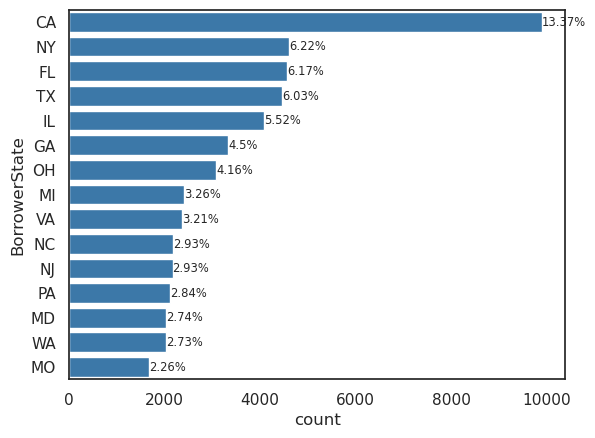

In [140]:

st_cnt = df.BorrowerState.value_counts()[0:15]
st_pct = df.BorrowerState.value_counts(normalize=True)*100

sns.countplot(data=df, y="BorrowerState", order=df.BorrowerState.value_counts().iloc[:15].index, color=color);

for i, count in enumerate(st_cnt):
    pct_str = '{}%'.format(st_pct[i].round(2))
    plt.text(count+1, i, pct_str, va='center', size='x-small');


We can see that of the 15 states with the most borrowers, California had the most (13.37%) and Missouri had the least (2.26%.)

> What is the distribution of DebtToIncomeRatio across loan listings?

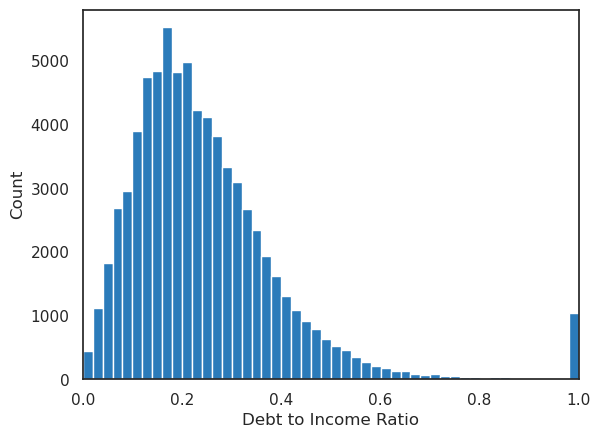

In [83]:
plt.hist(data=df, x='DebtToIncomeRatio', bins=500, color=color)
plt.xlim(xmin=0, xmax = 1)
plt.ylabel('Count')
plt.xlabel('Debt to Income Ratio');

From the histogram we see that 'Debt To Income Ratio' is slightly right-skewed with a mode slightly less than 0.2 and mean of .27. There are a number of outliers because we assigned the value of 1.0 to individuals without a source of income.

> What is the typical employment status for borrowers?

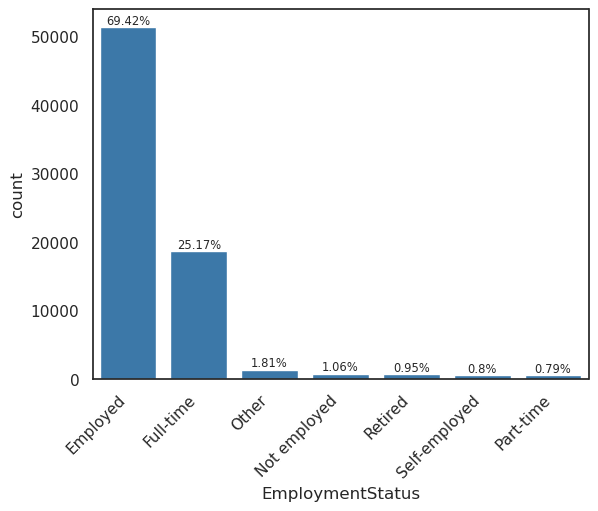

In [144]:
emp_cnt = df.EmploymentStatus.value_counts()[:]
emp_pct = df.EmploymentStatus.value_counts(normalize=True)*100
emp_pct = emp_pct.round(2)

sns.countplot(data=df, x="EmploymentStatus", color=color, order=emp_cnt.index)
plt.xticks(rotation=45, ha='right');

for i, count in enumerate(emp_cnt):
    pct_str = '{}%'.format(emp_pct[i])
    plt.text(i, count, pct_str, va='bottom', ha='center', size='x-small');

We can easily see that 'retired' and 'not employed' individuals make up only 2% of borrower and likely aren't the reason behind defaulted loans. 

Unfortunately we can't segment the 'employed' and can't use this bar plot to learn anything about the true distribution between full-time, part-time, and self-employed. With more time, we could remove the 'Employed' rows and look at a subset of the data to explore further. 

For the remainder of the exploration we'll combine 'Full-Time', 'Part-Time', and 'Self-Employed'.

In [145]:
df.EmploymentStatus = df.EmploymentStatus.replace({'Self-employed': 'Employed',
                        'Full-time': 'Employed', 'Part-time': 'Employed'})

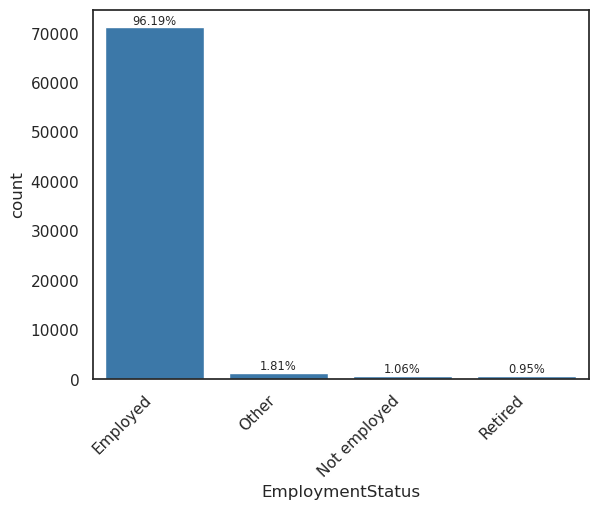

In [146]:
emp_cnt = df.EmploymentStatus.value_counts()[:]
emp_pct = df.EmploymentStatus.value_counts(normalize=True)*100
emp_pct = emp_pct.round(2)

sns.countplot(data=df, x="EmploymentStatus", color=color, order=emp_cnt.index)
plt.xticks(rotation=45, ha='right');

for i, count in enumerate(emp_cnt):
    pct_str = '{}%'.format(emp_pct[i])
    plt.text(i, count, pct_str, va='bottom', ha='center', size='x-small');